In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('Data/MICE_data.csv', index_col=[0])
df.head()

/rds/general/user/cam119/home/anaconda3/envs/ML_project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,birth_mn,birth_time,birth_dy,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
0,1.0,1.0,30.7,0.0,3657.0,4.000000,2017.000000,1.0,1227.0,2.0,...,0.0,1.0,2.0,190.0,1.0,2.0,0.0,0.0,1.0,41.0
1,1.0,1.0,33.3,2.0,3242.0,6.811794,2016.777958,1.0,1704.0,2.0,...,0.0,2.0,0.0,188.0,4.0,2.0,1.0,2.0,0.0,0.0
2,1.0,1.0,30.0,0.0,3470.0,4.000000,2017.000000,1.0,336.0,2.0,...,0.0,1.0,0.0,215.0,1.0,1.0,0.0,0.0,1.0,58.0
3,3.0,1.0,23.7,0.0,3140.0,5.000000,2017.000000,1.0,938.0,2.0,...,0.0,2.0,0.0,138.0,1.0,2.0,0.0,0.0,0.0,0.0
4,1.0,1.0,35.5,0.0,2125.0,6.822145,2016.826229,1.0,830.0,3.0,...,0.0,1.0,4.0,220.0,3.0,1.0,0.0,0.0,1.0,0.0


In [7]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [8]:
X_scaled = StandardScaler().fit_transform(X)

In [9]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [10]:
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scaled)

In [11]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09100049, 0.07407741, 0.06927332, 0.0523902 , 0.04689643])

In [12]:
#These 5 principal components only explain 14% of the variance.. not good 
sum(explained_variance)*100

33.363785650864905

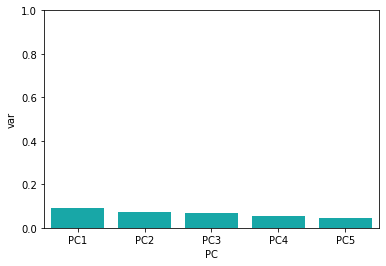

In [13]:
pca_df = pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4','PC5']})

sns.barplot(x='PC', y="var", data=pca_df, color="c").set(ylim=(0, 1));

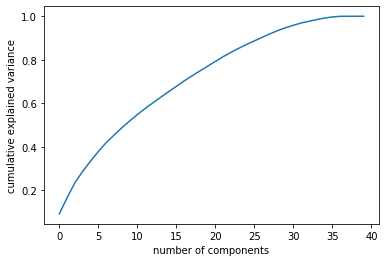

In [14]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* Could try randomised PCA etc.?